In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1490,2020-09-01,United Kingdom,335643.0,335873.0,41545.0,41501.0,-230.0,44.0
1491,2020-09-01,Germany,243189.0,243599.0,9309.0,9302.0,-410.0,7.0
1492,2020-09-01,Iran,377827.0,375212.0,21721.0,21571.0,2615.0,150.0
1493,2020-09-01,Turkey,269832.0,270133.0,6357.0,6370.0,-301.0,-13.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  7994.250836120401
RMSE =  31305.133604260533


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  302.3478260869565
RMSE =  745.9477121740229


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  56046.535211267605
RMSE =  98328.72660607292
-- World performances for deaths --
MAE =  1697.6901408450703
RMSE =  2083.691354776861


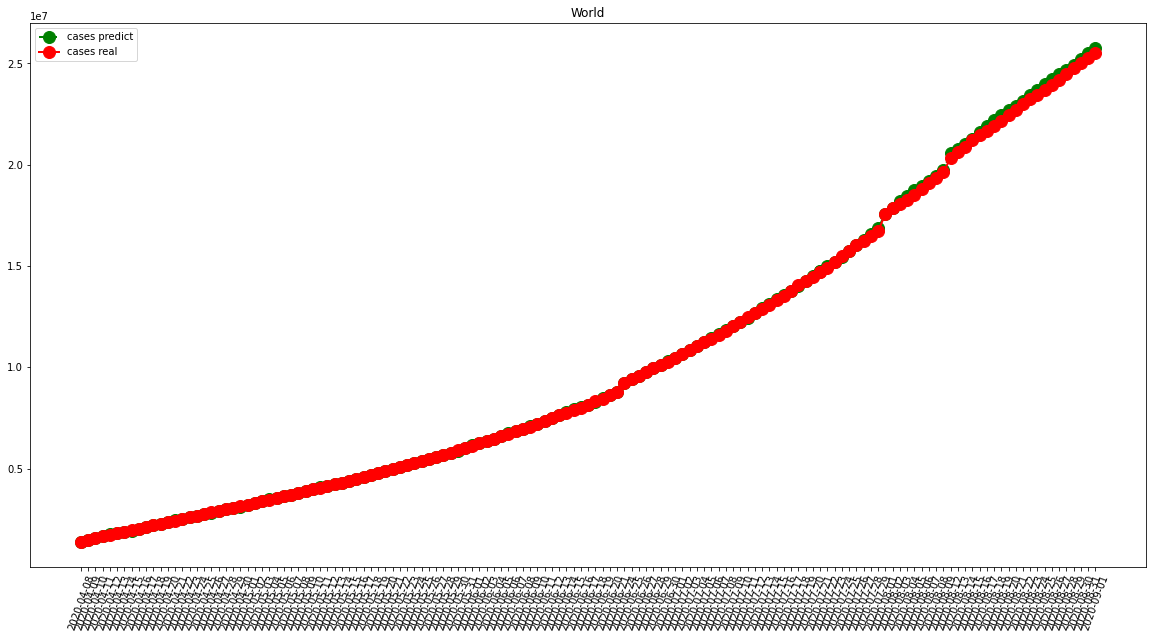

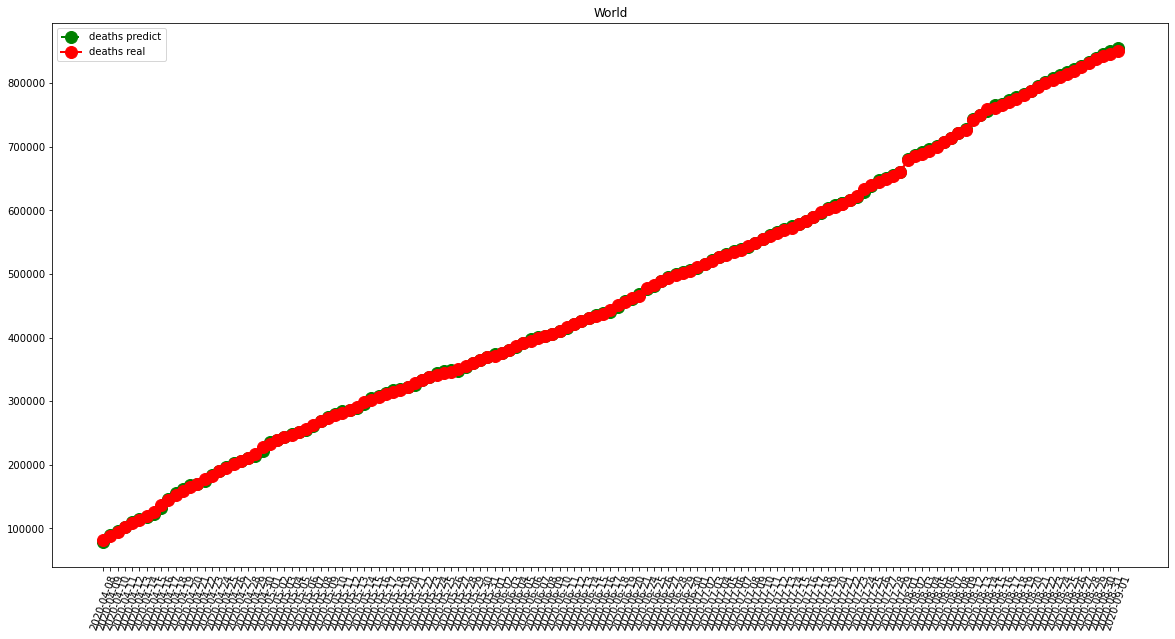

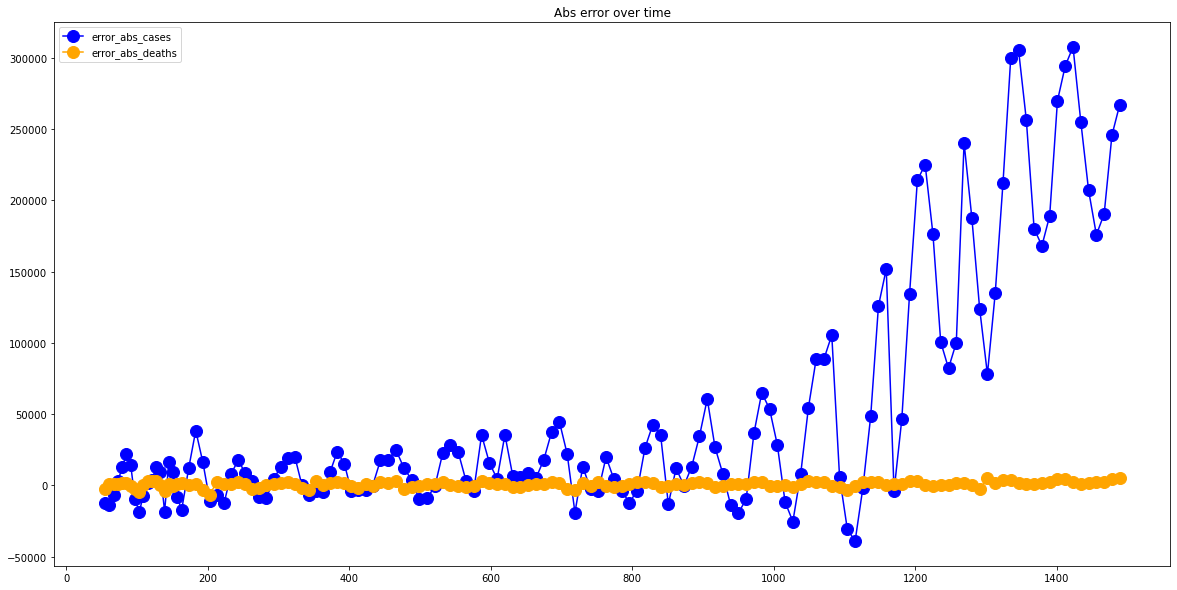

In [7]:
visShow("World")

-- France performances for cases --
MAE =  968.171052631579
RMSE =  1457.34322981022
-- France performances for deaths --
MAE =  122.78289473684211
RMSE =  272.05597576118123


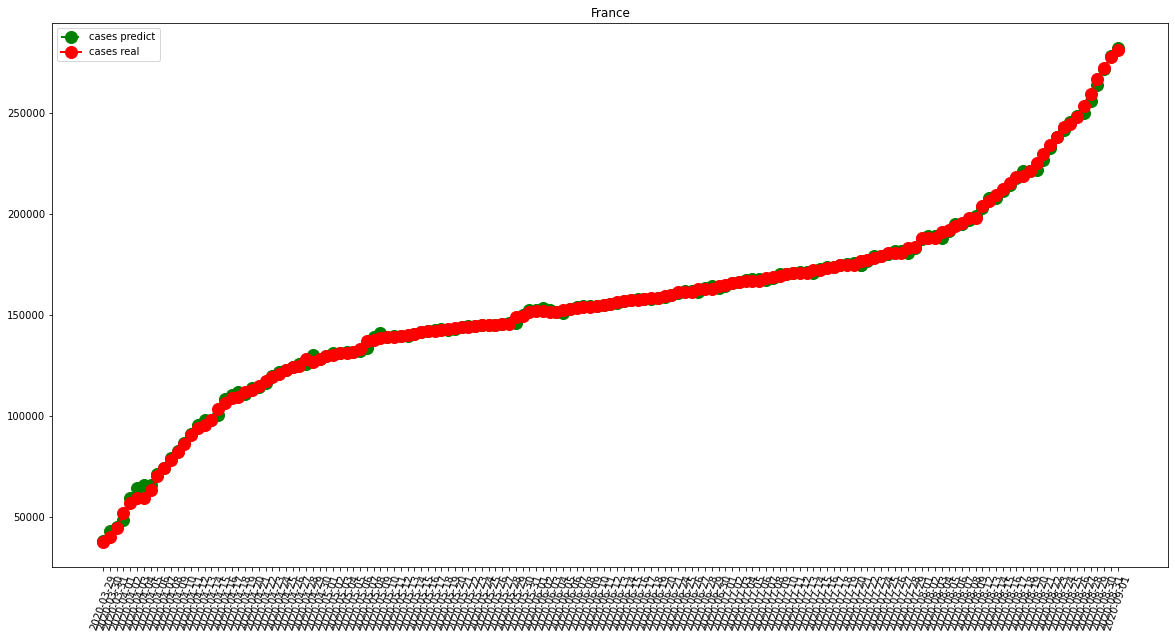

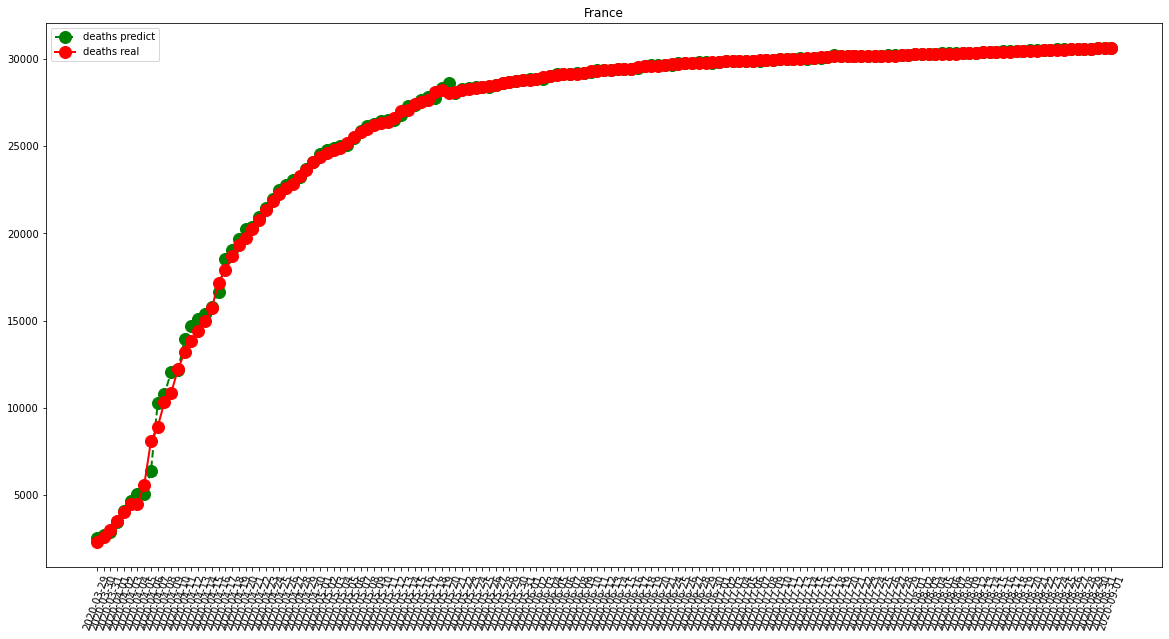

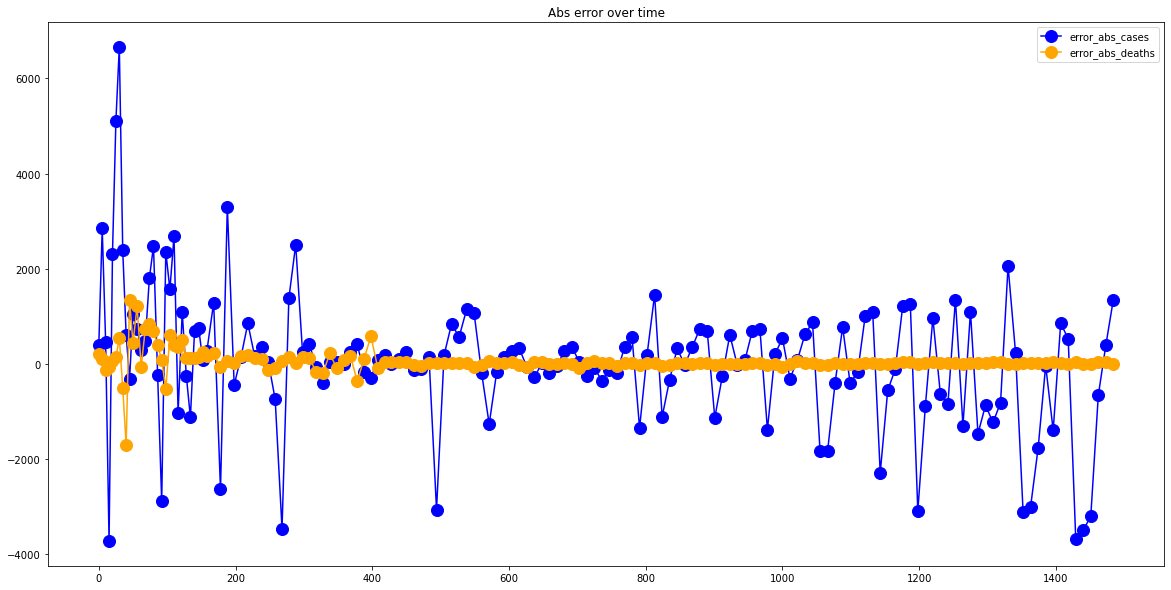

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  302.05263157894734
RMSE =  455.54818047802814
-- Italy performances for deaths --
MAE =  73.25657894736842
RMSE =  240.7745314604516


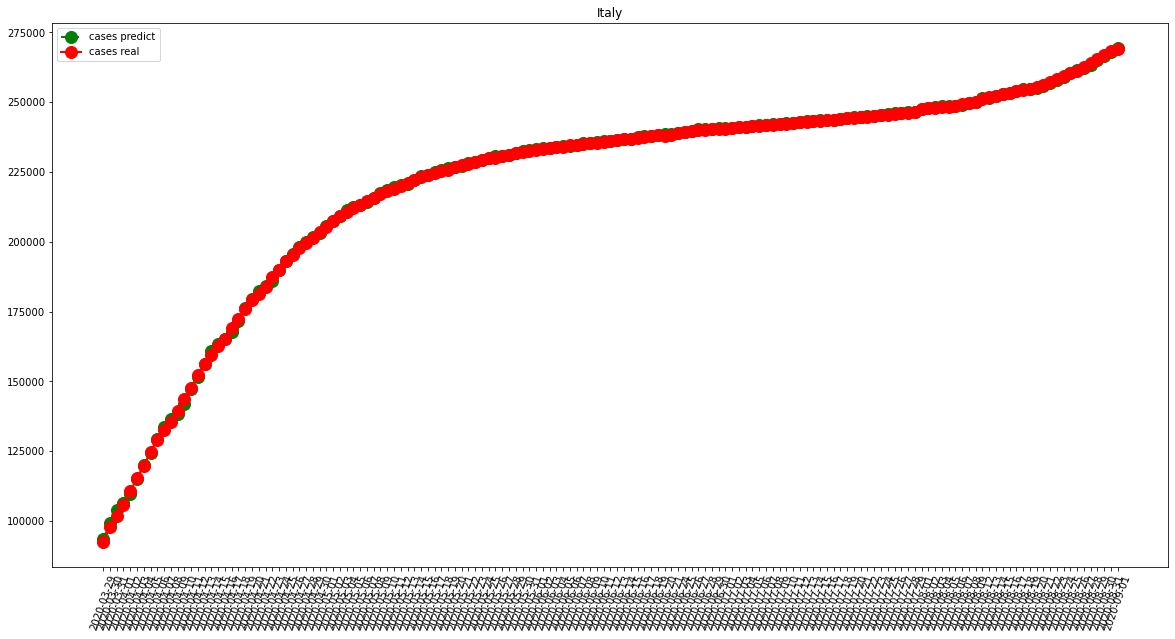

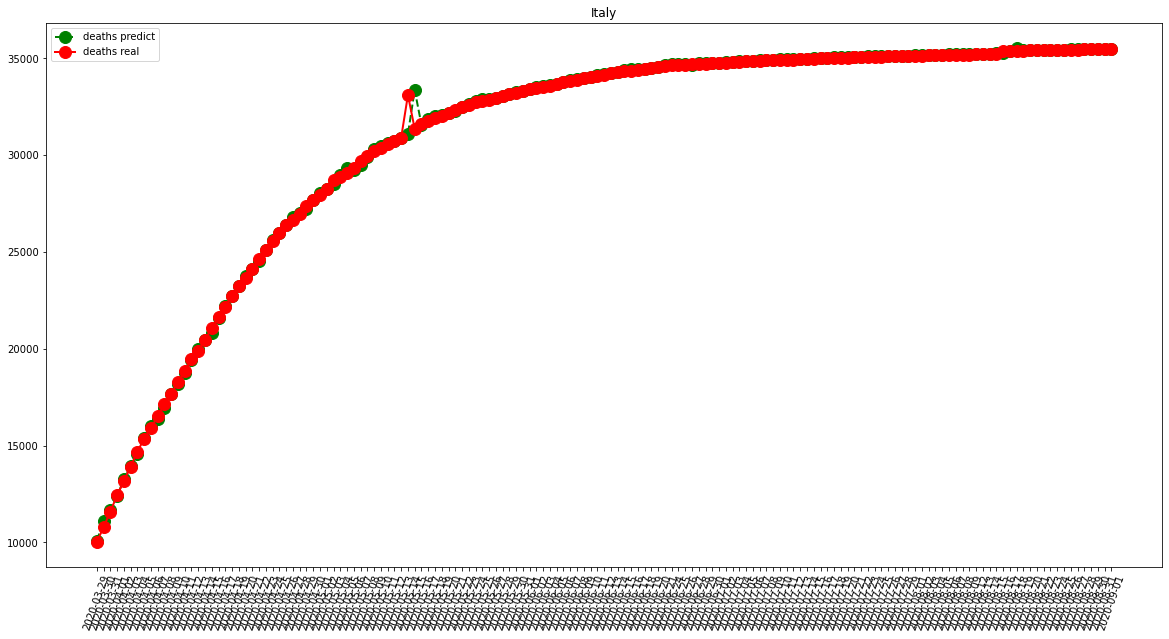

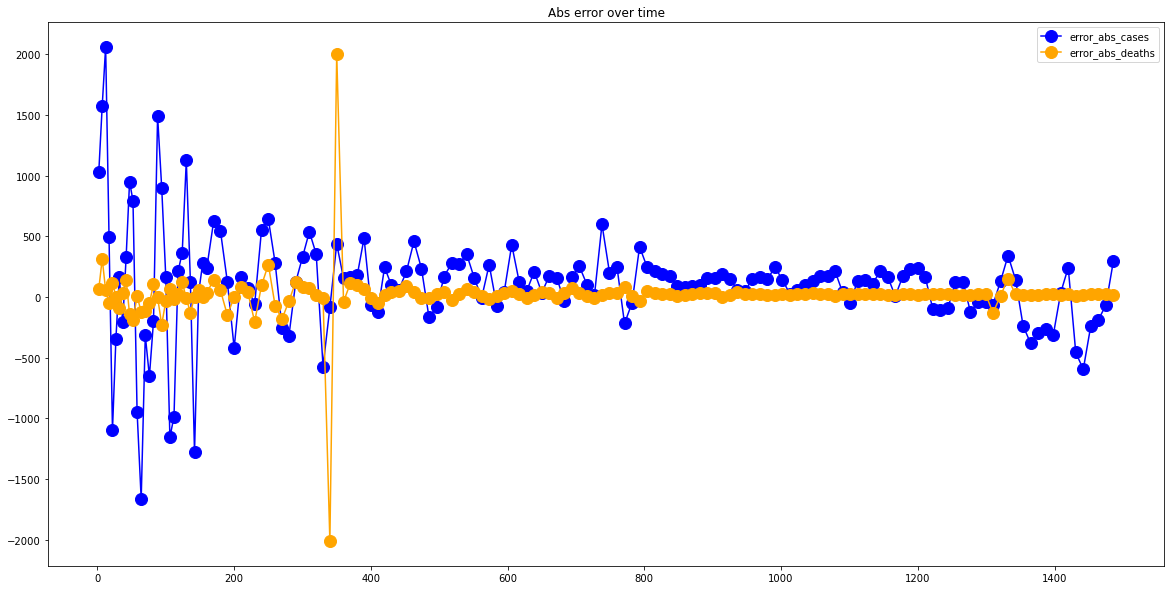

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  1947.0526315789473
RMSE =  3862.6770611775673
-- Spain performances for deaths --
MAE =  126.35526315789474
RMSE =  329.60816050832875


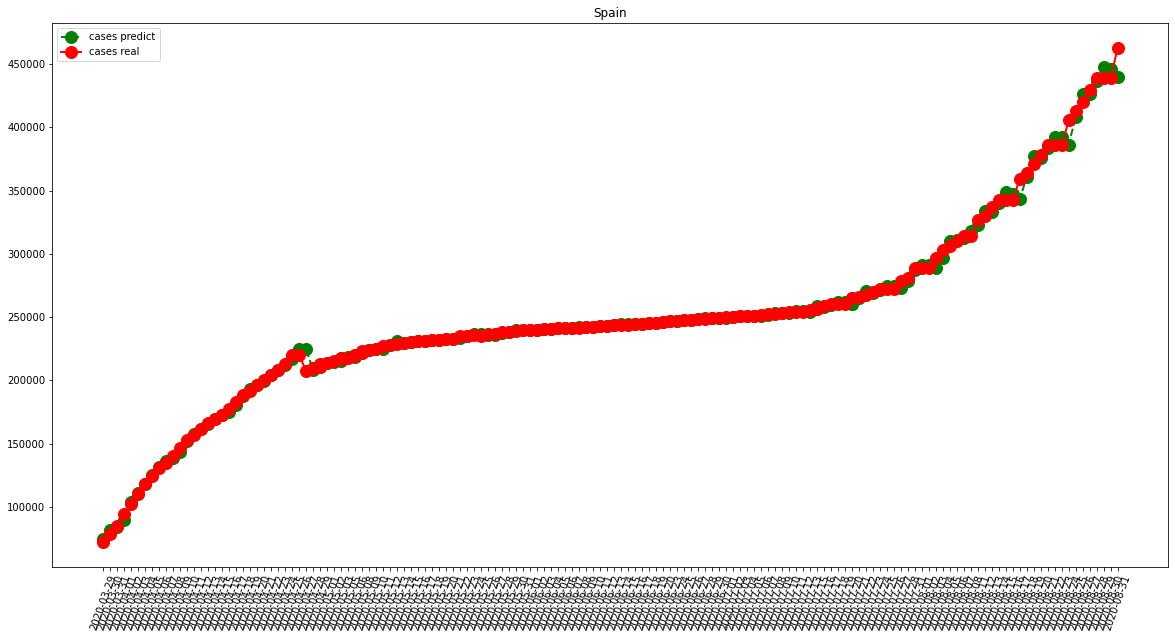

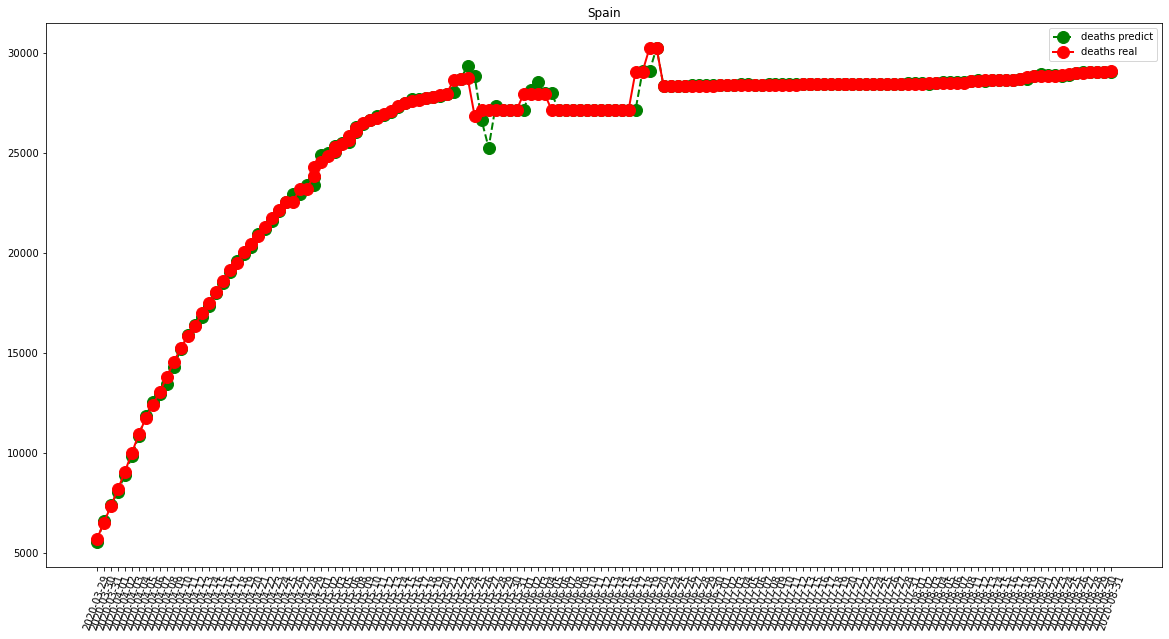

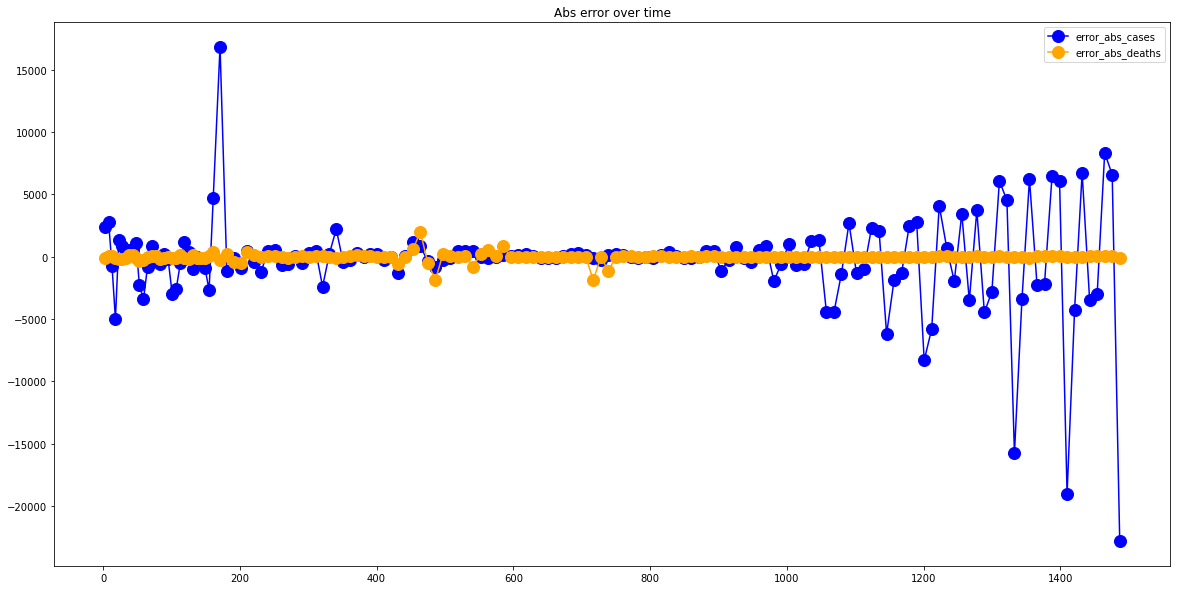

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  12065.809210526315
RMSE =  18871.376966153905
-- United States performances for deaths --
MAE =  491.3355263157895
RMSE =  693.3026936338846


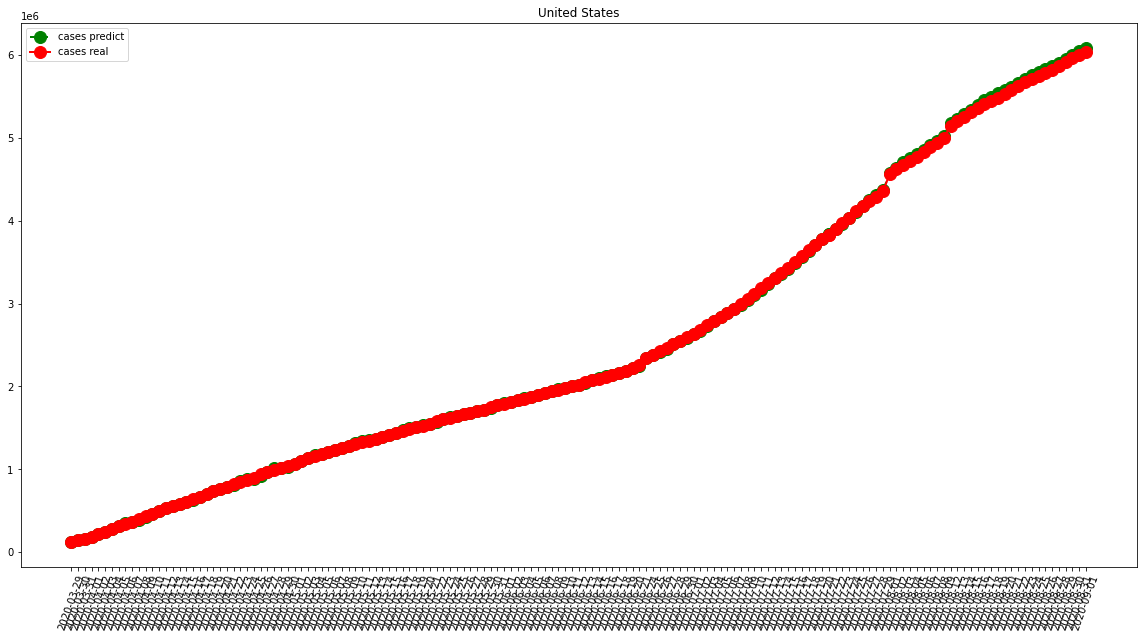

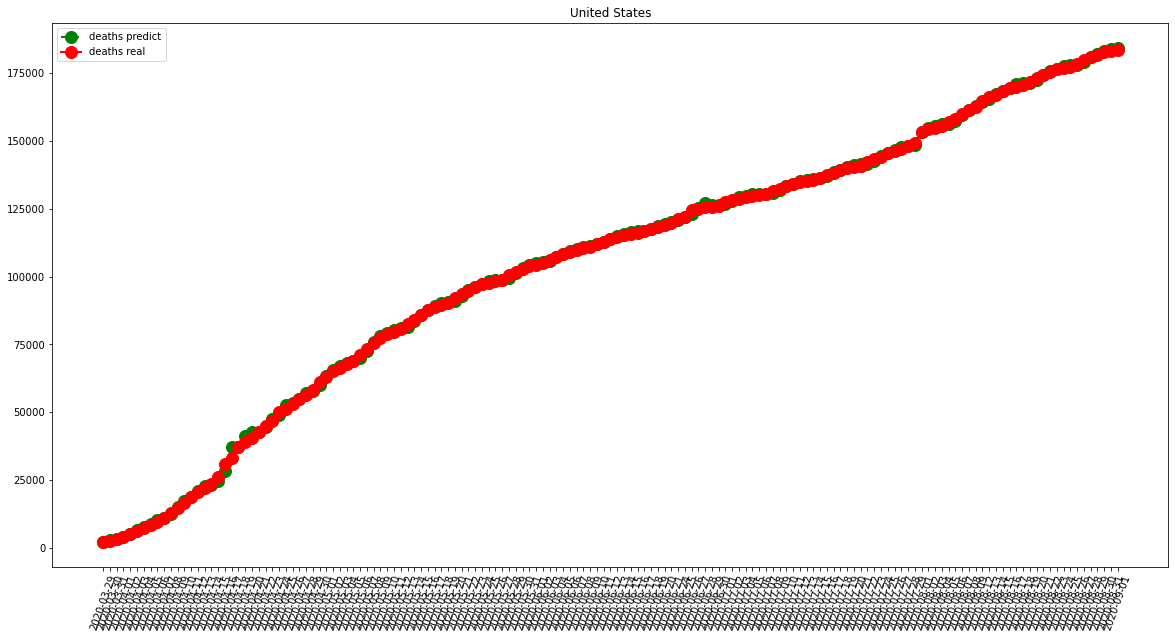

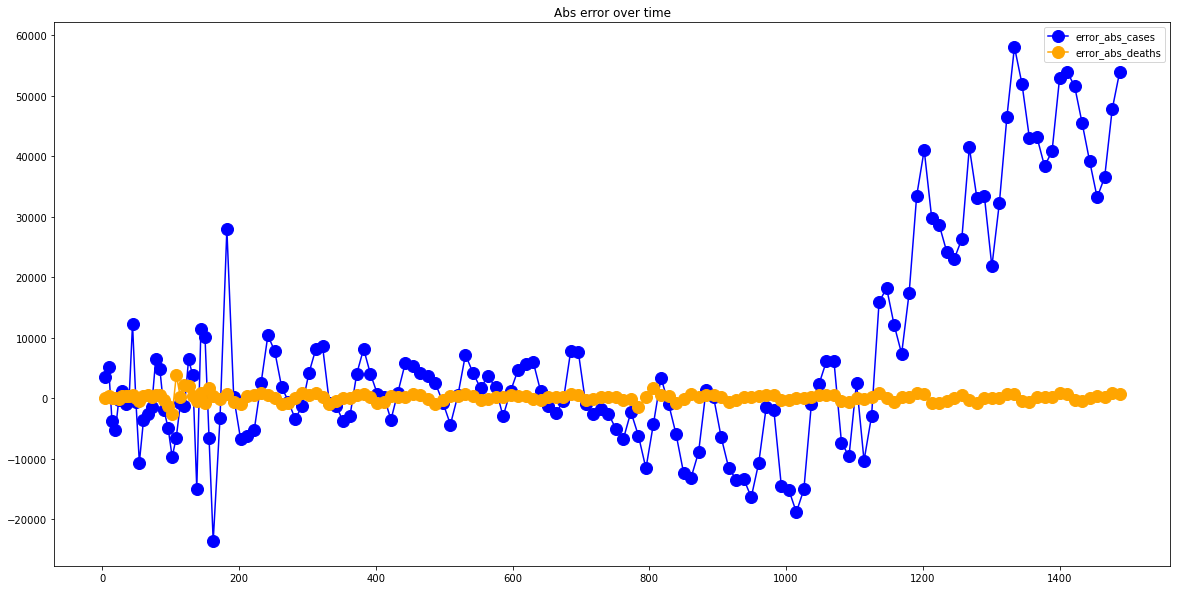

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  65.78289473684211
RMSE =  96.77840260371275
-- China performances for deaths --
MAE =  27.414473684210527
RMSE =  127.36119895792439


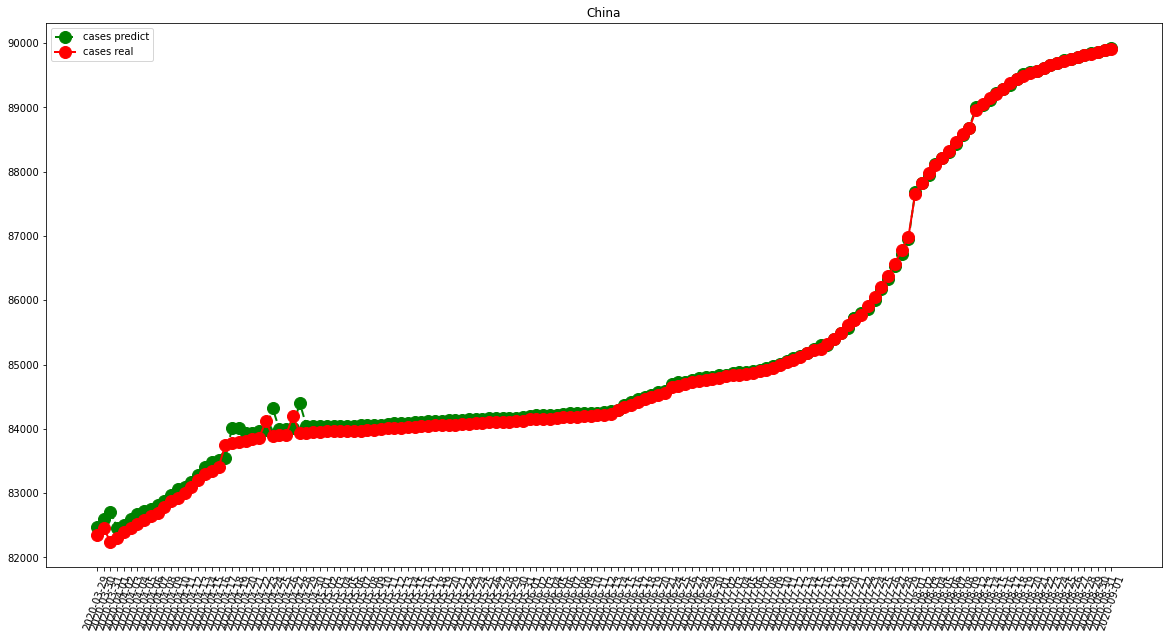

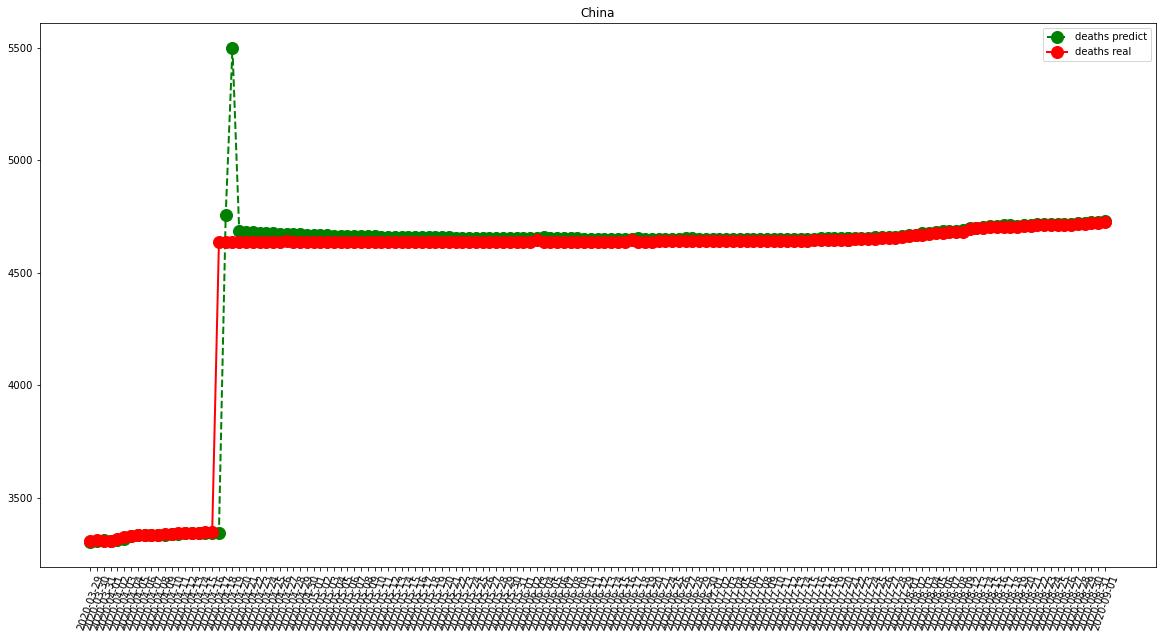

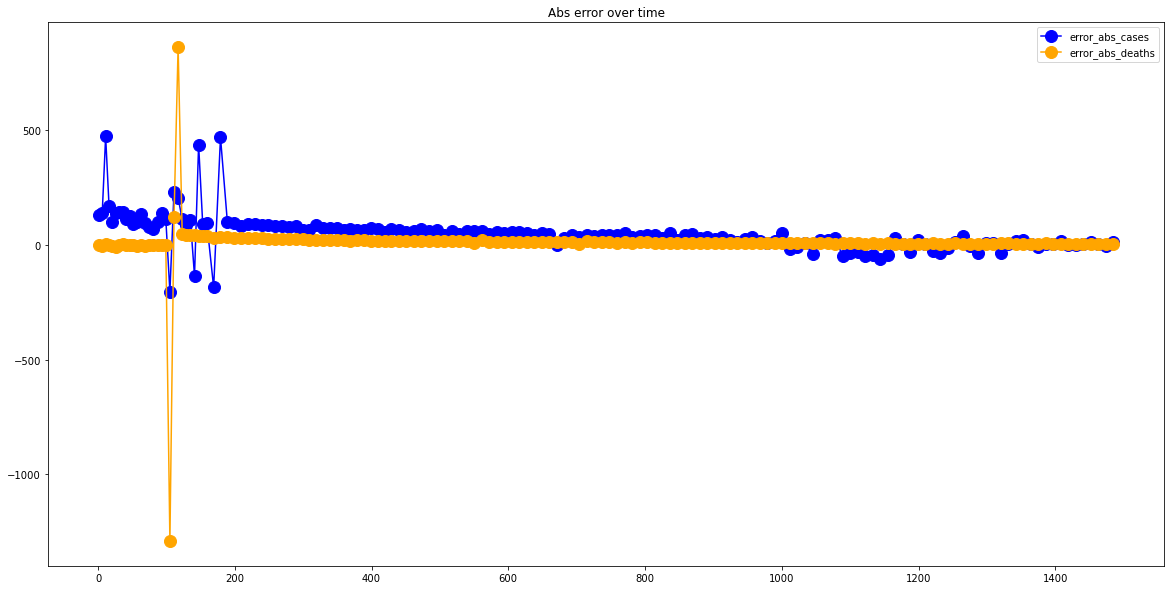

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1059.8306451612902
RMSE =  3754.9655672576177
-- United Kingdom performances for deaths --
MAE =  243.8709677419355
RMSE =  766.3864939209956


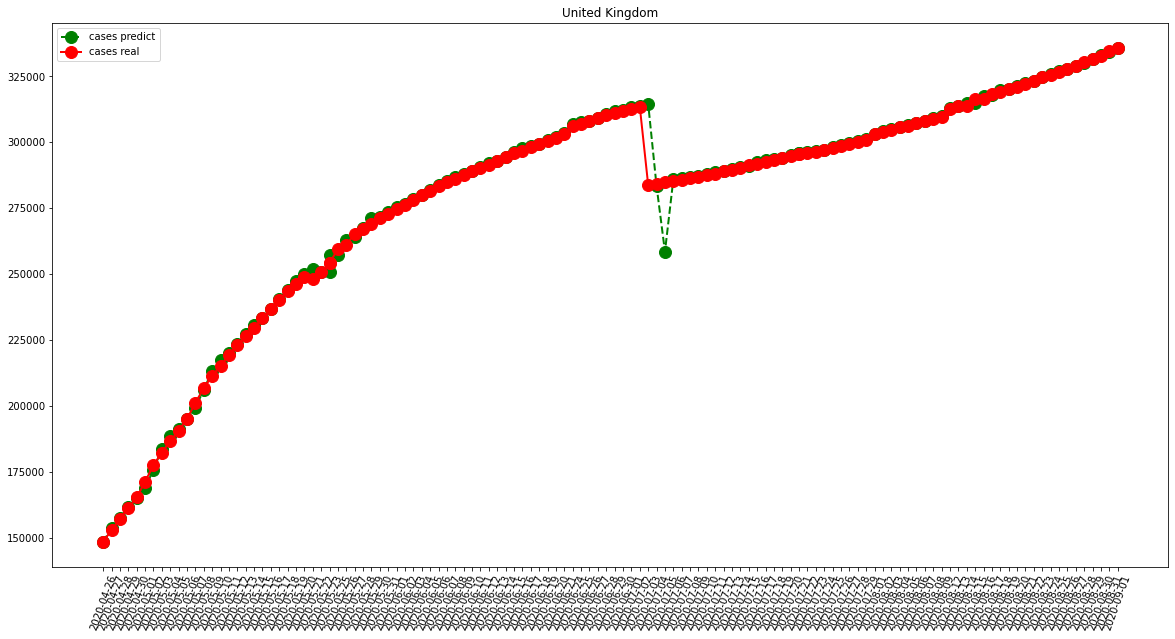

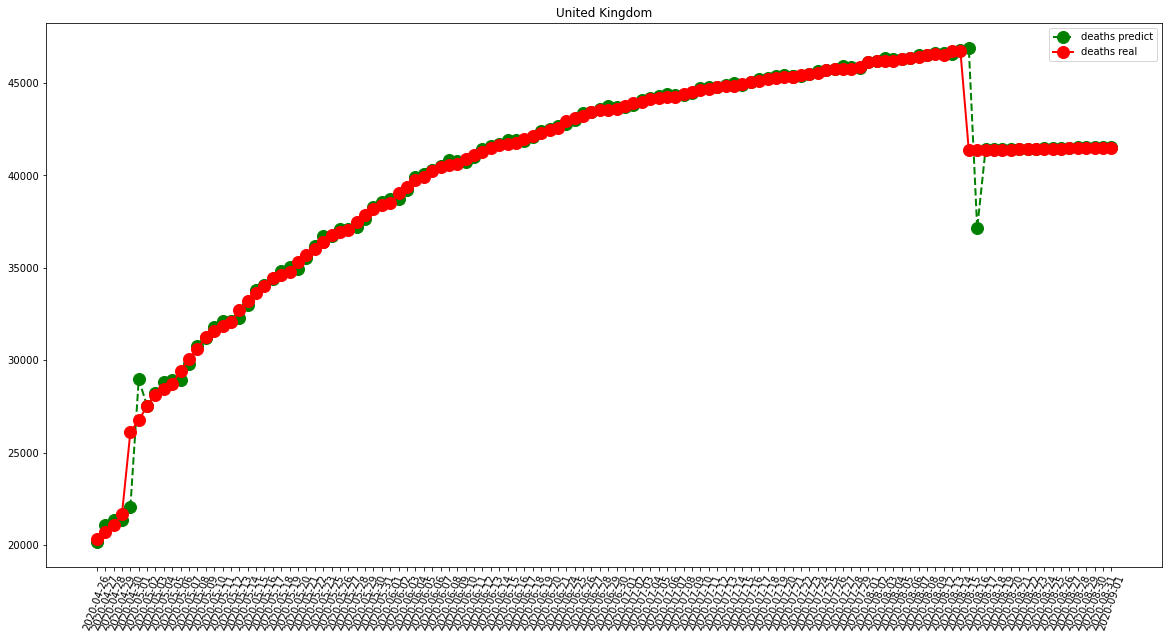

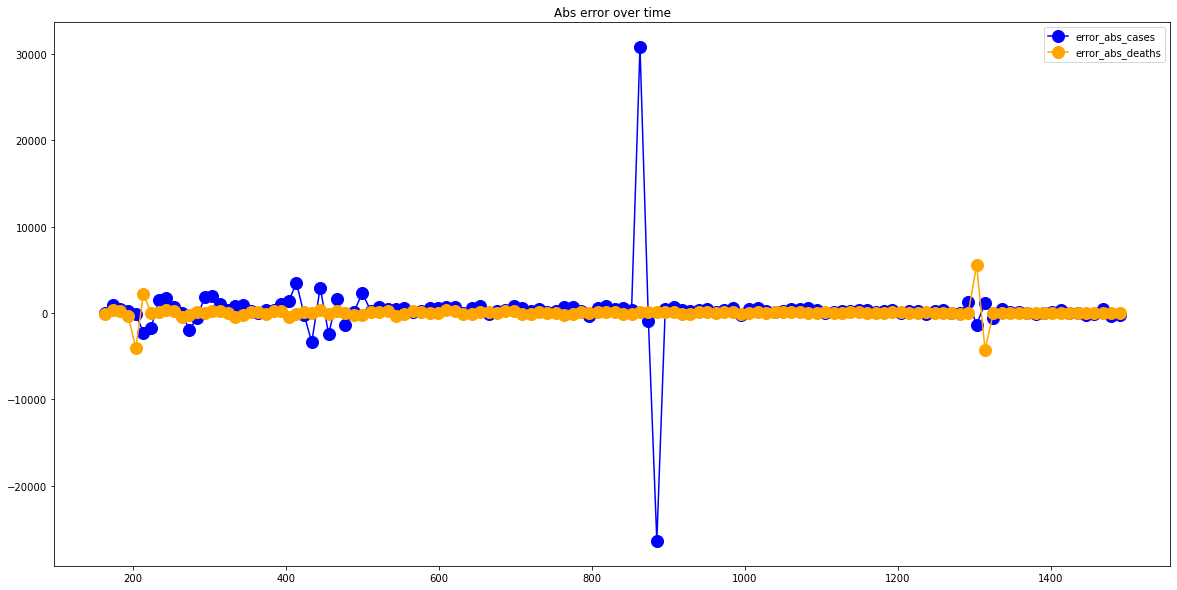

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  399.80645161290323
RMSE =  584.1514662173424
-- Germany performances for deaths --
MAE =  21.04032258064516
RMSE =  39.46548103784353


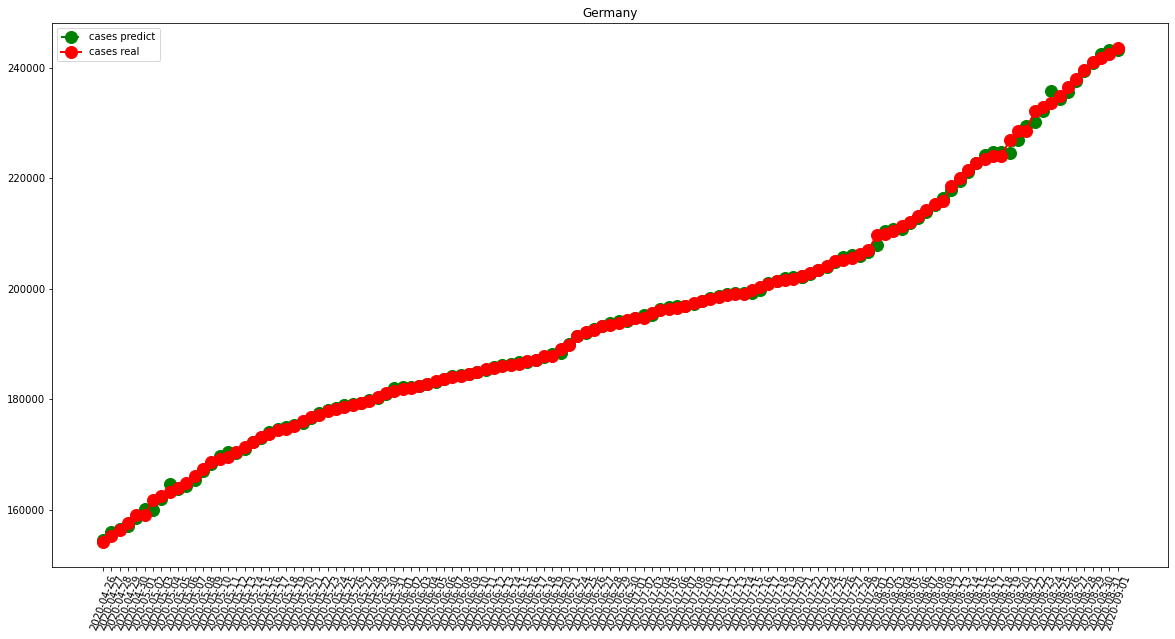

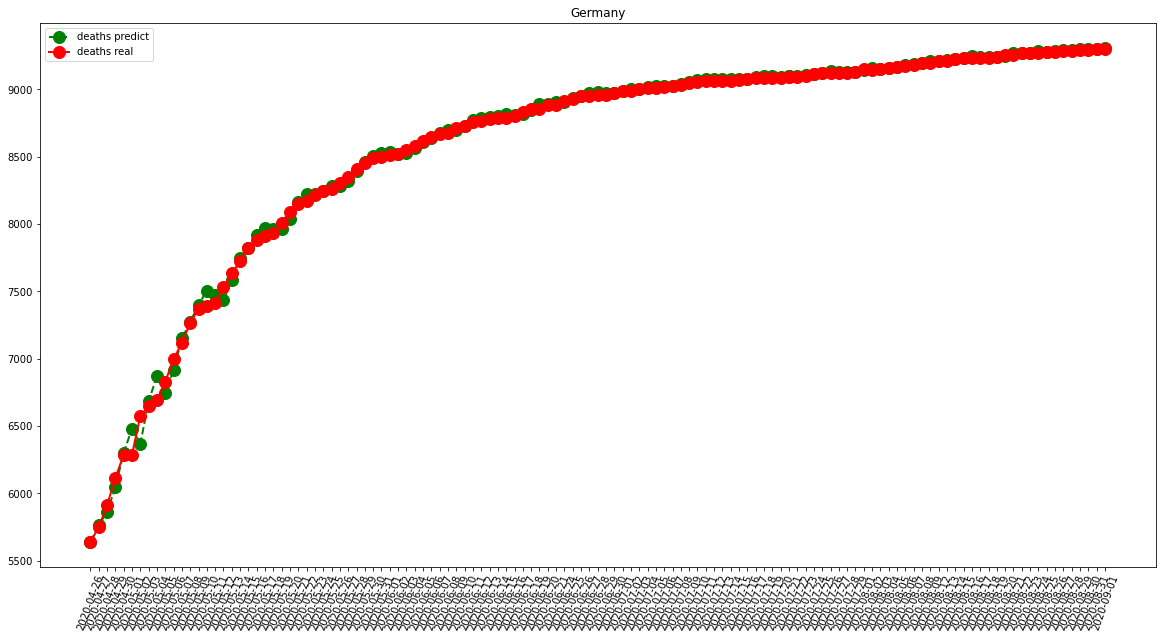

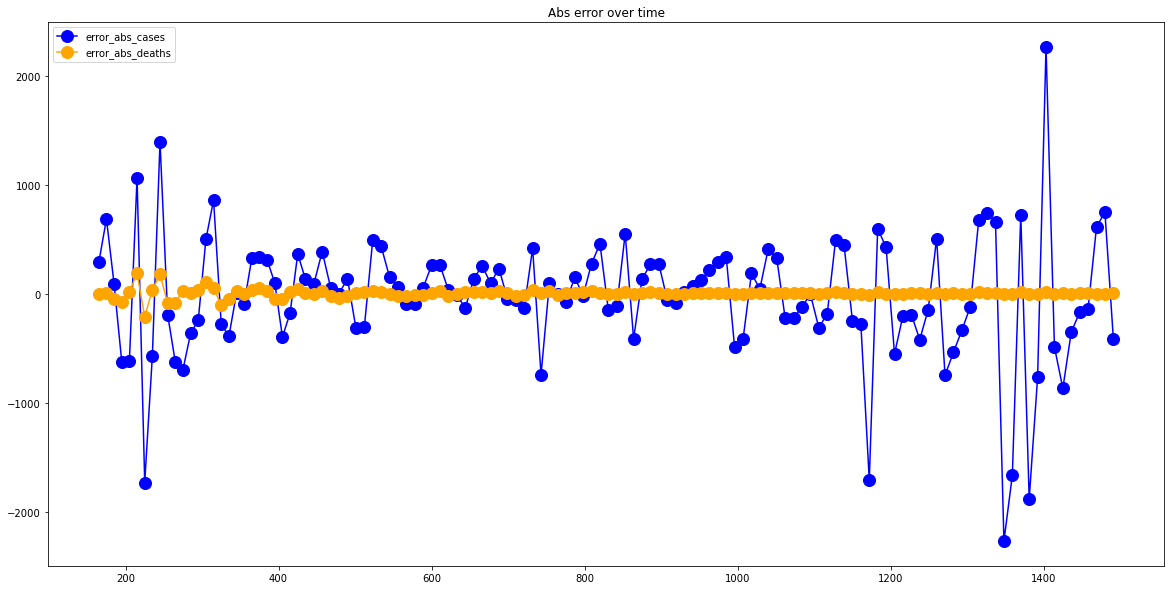

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  790.016129032258
RMSE =  1162.9878996957405
-- Iran performances for deaths --
MAE =  44.62096774193548
RMSE =  82.21779691181379


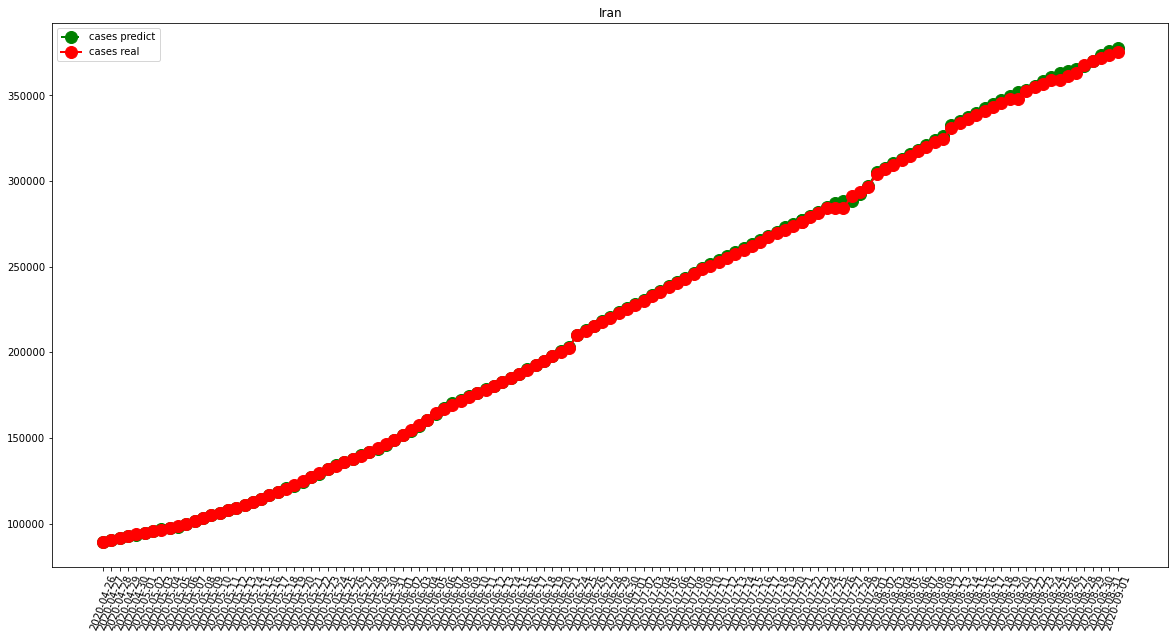

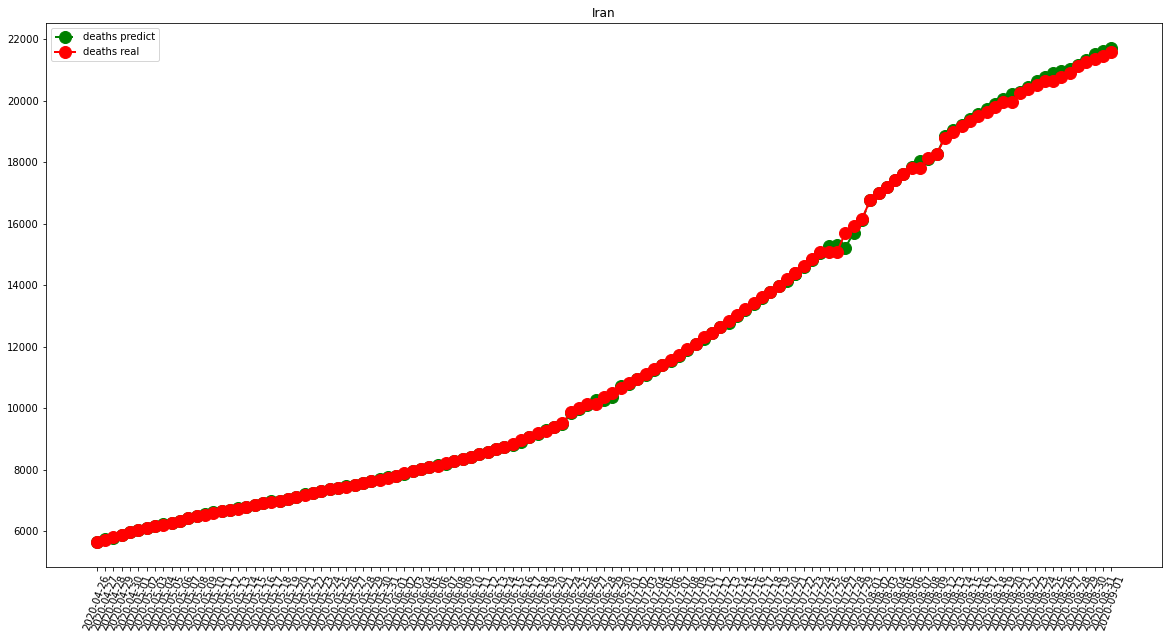

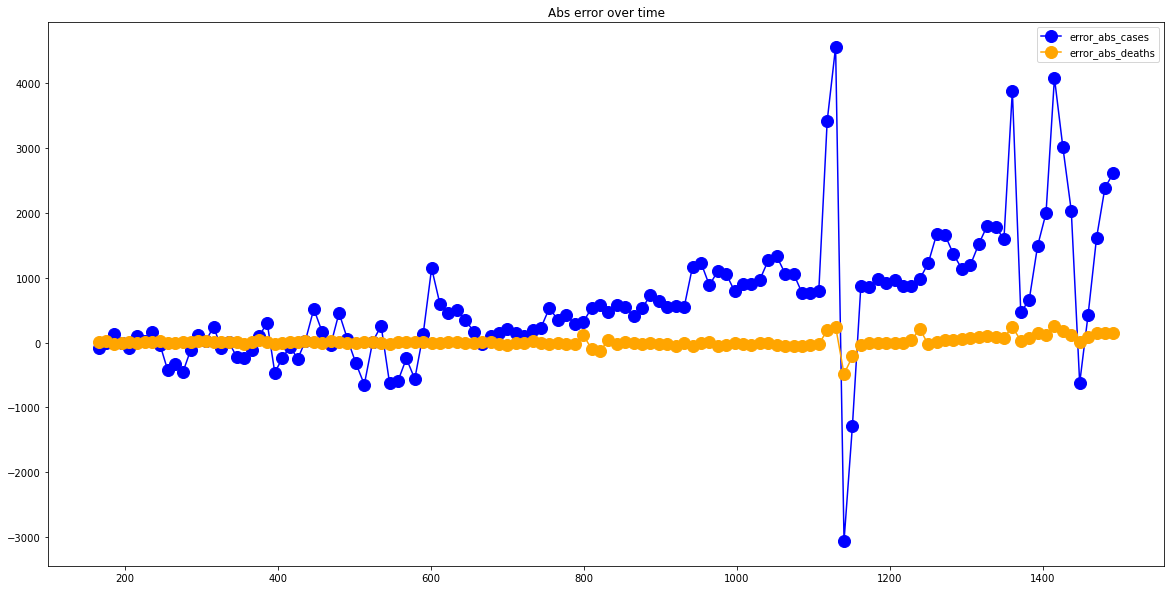

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  202.07258064516128
RMSE =  326.09026802900115
-- Turkey performances for deaths --
MAE =  16.330645161290324
RMSE =  91.21761466847536


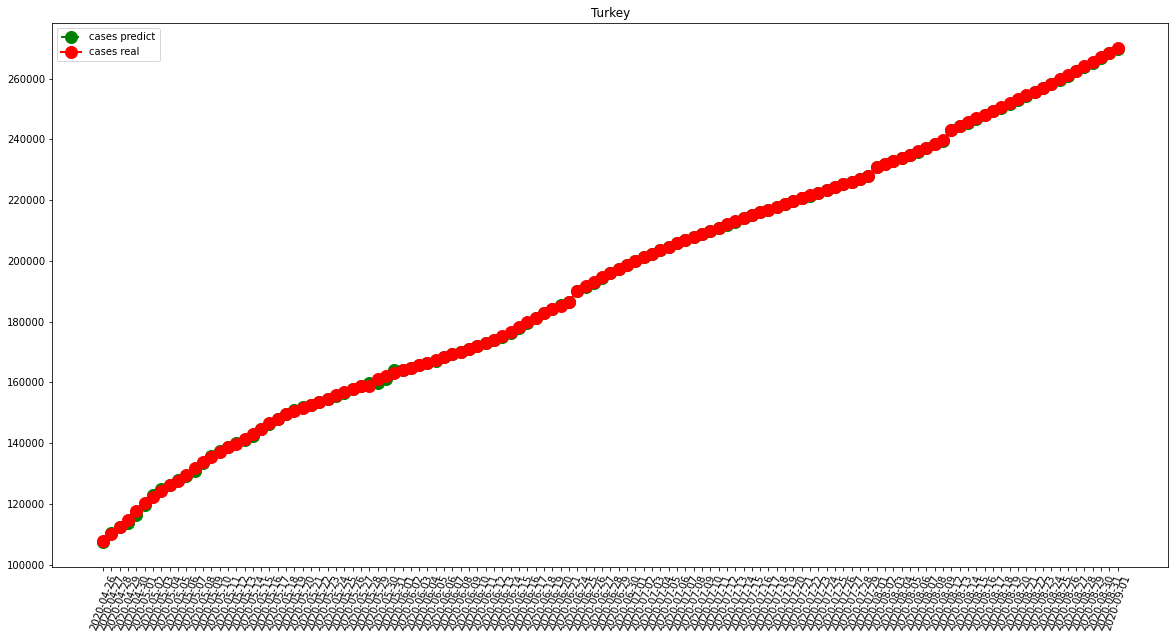

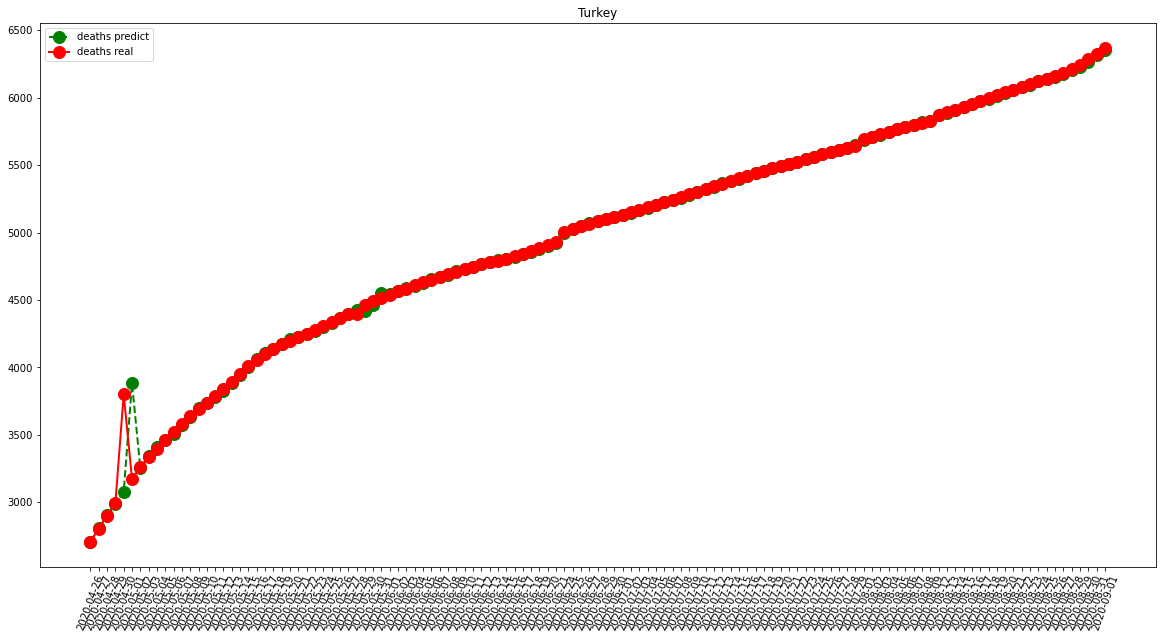

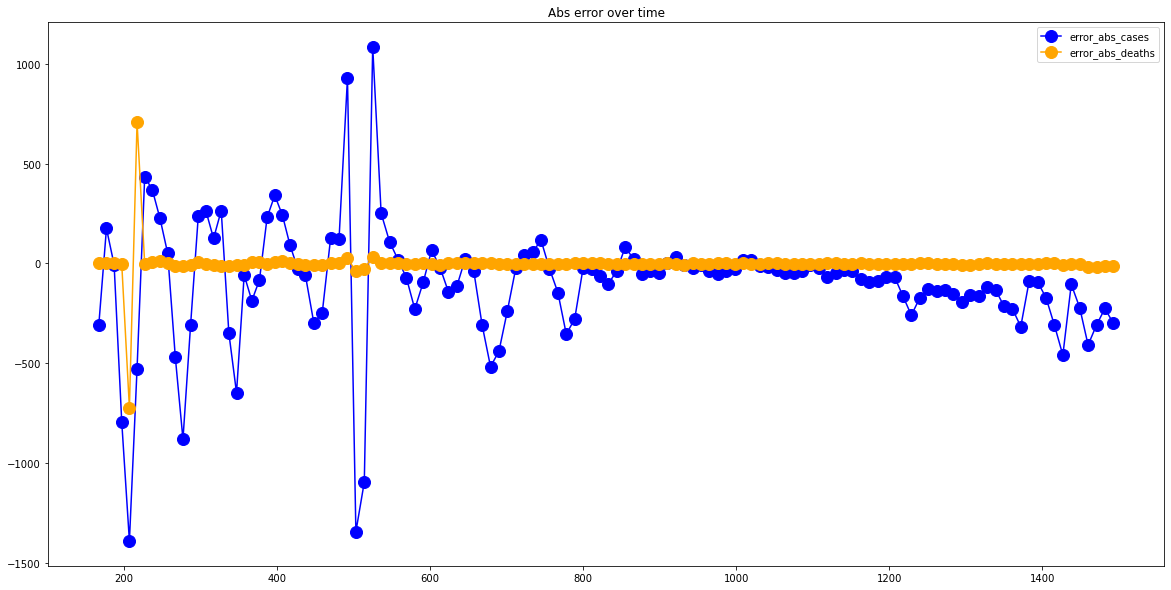

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  13976.855670103092
RMSE =  18572.154590515896
-- Brazil performances for deaths --
MAE =  439.96907216494844
RMSE =  540.5848017055711


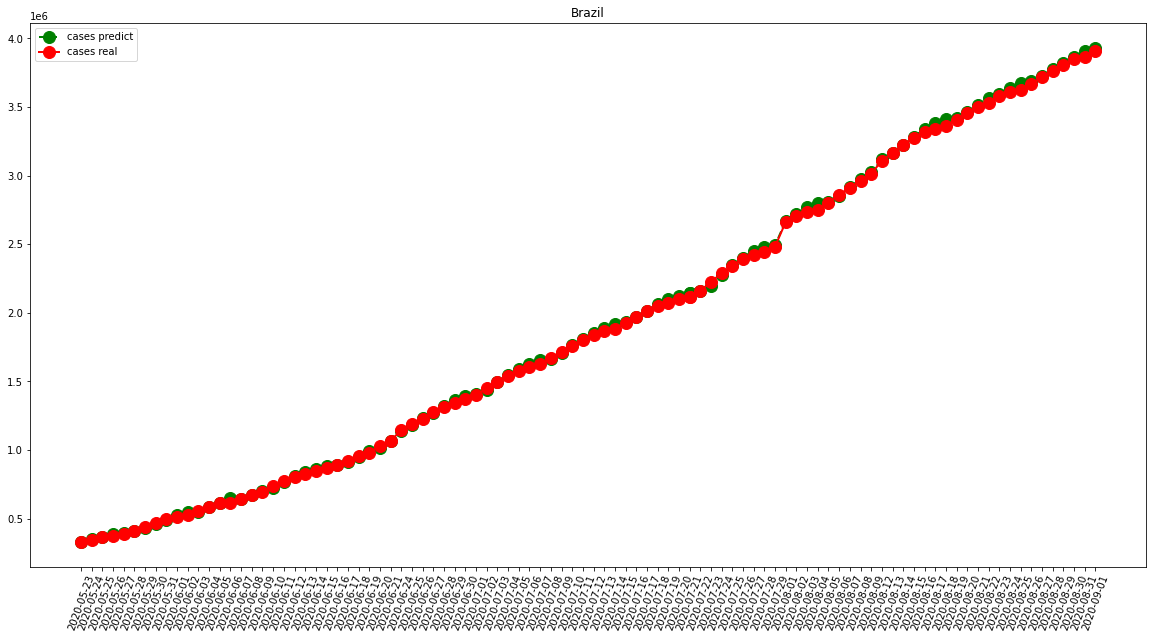

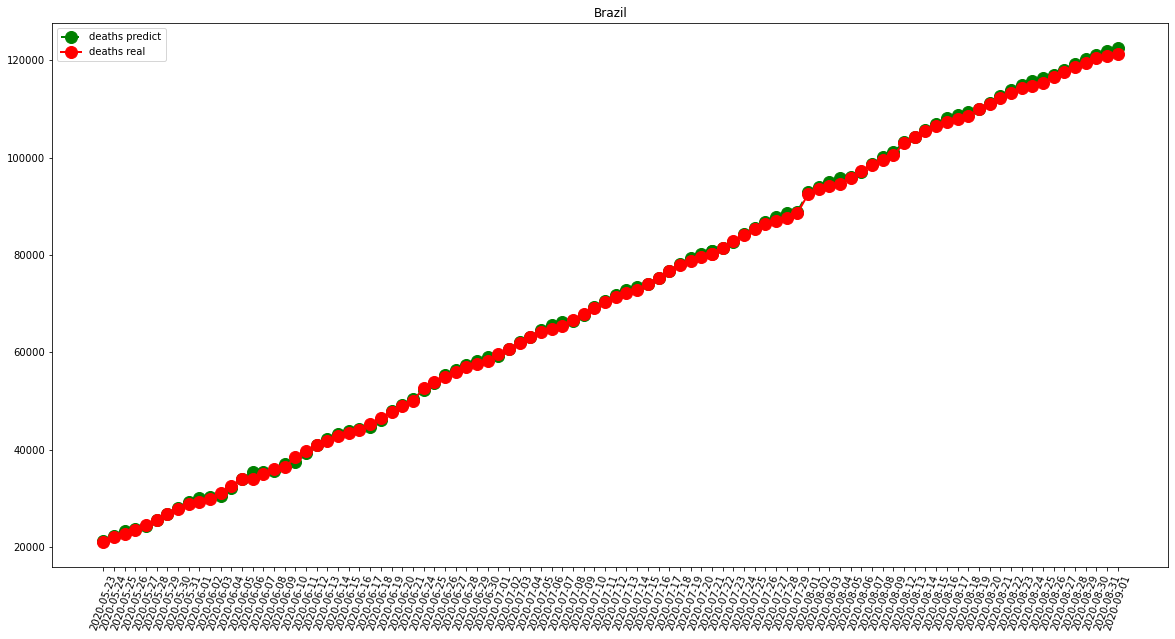

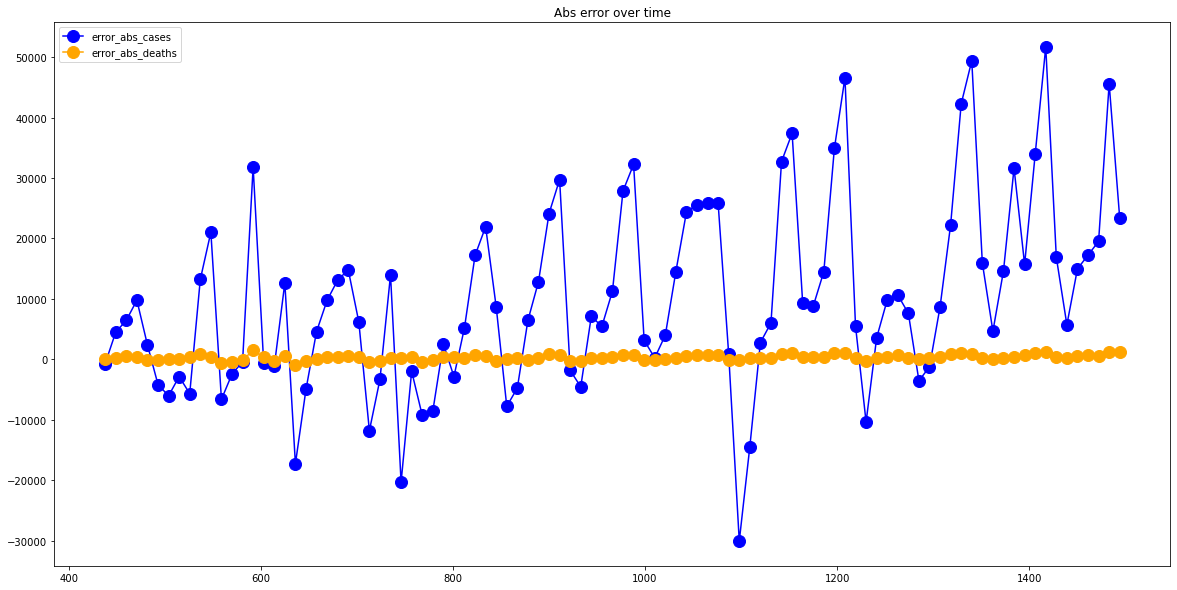

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)